In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Sentimental Data

In [2]:
df = pd.read_csv('SentimentalDataset.csv')

0 Indicating it is a Neutral Tweet/Comment
1 Indicating a Postive Sentiment
-1 Indicating a Negative Tweet/Comment

In [3]:
df['category'].unique()

array([-1.,  0.,  1., nan])

Text(0.5, 1.0, 'category')

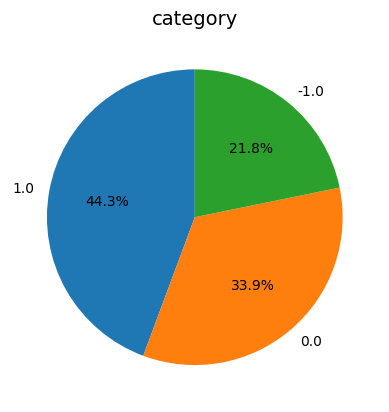

In [4]:
category_counts = df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('category', fontsize=14)

In [5]:
percent_nan = df['category'].isnull().mean() * 100
print(percent_nan)

0.004295005522149957


In [6]:
df['category'].fillna(df['category'].mode()[0])

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162980, dtype: float64

In [7]:
df['category'] = df['category'].astype(str).replace({
    '1.0': '1', '-1.0': '-1', '0.0': '0'
})
df.rename(columns={'category': 'sentiment_label' }, inplace=True)


In [9]:
print(df.isnull().sum())
df.dropna(subset=['clean_text'], inplace=True)

clean_text         4
sentiment_label    0
dtype: int64


In [11]:
print(df.isnull().sum())

clean_text         0
sentiment_label    0
dtype: int64


### HateSpeechData

In [13]:
df_HS = pd.read_csv('HateSpeechDataset.csv')

In [14]:
df_HS.drop(columns='Unnamed: 0', inplace=True)
df_HS.rename(columns={'Toxicity': 'hate_label'}, inplace=True)

In [15]:
df_HS['hate_label'].unique()

array([0, 1])

Text(0.5, 1.0, 'hate_label')

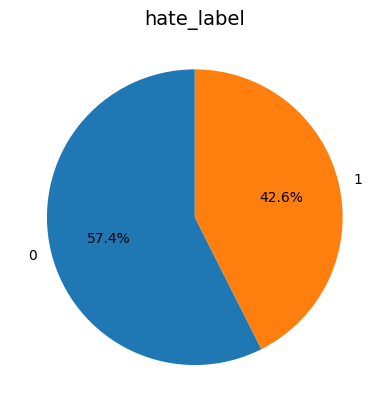

In [16]:
category_counts = df_HS['hate_label'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('hate_label', fontsize=14)

In [20]:
percent_nan = df_HS['tweet'].isnull().mean() * 100
print(percent_nan)

0.0


In [21]:
print(df_HS.isnull().sum())

hate_label    0
tweet         0
dtype: int64


### Data PreProcessing

In [23]:
df

,clean_text,sentiment_label
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1
162976,dear rss terrorist payal gawar what about modi...,-1
162977,did you cover her interaction forum where she ...,0
162978,there big project came into india modi dream p...,0


In [24]:
df_HS

,hate_label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [22]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
def text_cleaning(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text) #remove url
    text = re.sub(r'@\w+', '', text) #remove mention
    text = re.sub(r'#', '', text) #remove hashtag
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation
    text = emoji.demojize(text) #remove emojis
    text = re.sub(r'(.)\1+', r'\1\1', text) #normalize elongated word
    text = re.sub(r'^RT[\s]+', '', text)
    return text

#function for tokenization, stopword removal, and lemmatization
def text_processing(tweet):
    # Tokenize the cleaned text
    tokens = word_tokenize(tweet)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [27]:
df['tweets'] = df['clean_text'].apply(text_cleaning)
df['tweets'] = df['tweets'].apply(text_processing)

In [29]:
df_HS['tweets'] = df_HS['tweet'].apply(text_cleaning)
df_HS['tweets'] = df_HS['tweets'].apply(text_processing)

In [31]:
df.drop(columns='clean_text', inplace=True)
df_HS.drop(columns='tweet', inplace=True)

In [32]:
df

,sentiment_label,tweets
0,-1,modi promised minimum government maximum gover...
1,0,talk nonsense continue drama vote modi
2,1,say vote modi welcome bjp told rahul main camp...
3,1,asking supporter prefix chowkidar name modi gr...
4,1,answer among powerful world leader today trump...
...,...,...
162975,-1,456 crore paid neerav modi recovered congress ...
162976,-1,dear rss terrorist payal gawar modi killing 10...
162977,0,cover interaction forum left
162978,0,big project came india modi dream project happ...


In [33]:
df_HS

,hate_label,tweets
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time urð ðð ðð
4,0,factsguide society motivation
...,...,...
56740,1,yous muthafin lie 8220 right tl trash 8230 min...
56741,1,youve gone broke wrong heart baby drove rednec...
56742,1,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitch tellin lie


Model Building

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import classification_report
import numpy as np

### Multi-Task Learning (Preferred for Unified Models)
This approach trains a single BERT model with two separate output layers: one for hate speech detection and one for sentiment analysis.